In [19]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from simple_fem import Tria, Quad, get_cantilever

## Shape functions of a triangle element

In [20]:
# Define a triangle element
tria = Tria()

# Define the domain
x1 = torch.linspace(0, 1, steps=100)
x2 = torch.linspace(0, 1, steps=100)
x = torch.stack(torch.meshgrid(x1, x2, indexing="xy"), dim=2)
mask = x[..., 0] + x[..., 1] > 1.0
x[mask, :] = torch.nan


# Plot the shape functions
fig = make_subplots(
    rows=1,
    cols=3,
    horizontal_spacing=0.0,
    vertical_spacing=0.0,
    specs=[
        [{"type": "surface"}, {"type": "surface"}, {"type": "surface"}],
    ],
)
fig.add_trace(go.Surface(z=tria.N(x)[..., 0], x=x1, y=x2), row=1, col=1)
fig.add_trace(go.Surface(z=tria.N(x)[..., 1], x=x1, y=x2), row=1, col=2)
fig.add_trace(go.Surface(z=tria.N(x)[..., 2], x=x1, y=x2), row=1, col=3)
fig.update_traces(showscale=False)
fig.update_layout(autosize=False, width=1200, height=400)
fig.update_scenes(
    xaxis_title_text="ξ1", yaxis_title_text="ξ2", zaxis_title_text="N(ξ,η)"
)
fig.show()

## Shape functions of a quadrilateral element

In [21]:
# Define a quadrilateral element
quad = Quad()

# Define the domain
x1 = torch.linspace(-1, 1, steps=100)
x2 = torch.linspace(-1, 1, steps=100)
x = torch.stack(torch.meshgrid(x1, x2, indexing="xy"), dim=2)

# Plot the shape functions
fig = make_subplots(
    rows=2,
    cols=2,
    horizontal_spacing=0.0,
    vertical_spacing=0.0,
    specs=[
        [{"type": "surface"}, {"type": "surface"}],
        [{"type": "surface"}, {"type": "surface"}],
    ],
)
fig.add_trace(go.Surface(z=quad.N(x)[..., 0], x=x1, y=x2), row=1, col=1)
fig.add_trace(go.Surface(z=quad.N(x)[..., 1], x=x1, y=x2), row=1, col=2)
fig.add_trace(go.Surface(z=quad.N(x)[..., 2], x=x1, y=x2), row=2, col=1)
fig.add_trace(go.Surface(z=quad.N(x)[..., 3], x=x1, y=x2), row=2, col=2)
fig.update_traces(showscale=False)
fig.update_layout(autosize=False, width=800, height=800)
fig.update_scenes(
    xaxis_title_text="ξ1", yaxis_title_text="ξ2", zaxis_title_text="N(ξ,η)"
)
fig.show()

## A simple cantilever example

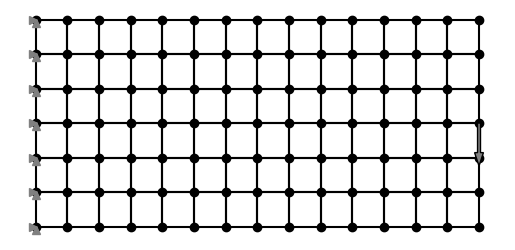

In [22]:
import matplotlib.pyplot as plt

# Define cantilever beam
cantilever = get_cantilever(1.0, 15.0, 7.0)
cantilever.plot()
plt.savefig("figures/cantilever_fem.pdf", transparent=True, bbox_inches="tight")

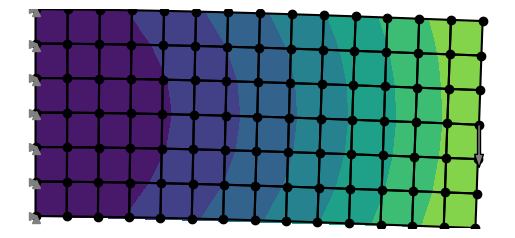

In [23]:
# Solve
d = torch.ones(cantilever.elements.shape[0])
u, f = cantilever.solve(d)

# Plot 
cantilever.plot(u, node_property=torch.norm(u, dim=1))
plt.savefig("figures/cantilever_fem_solved.pdf", transparent=True, bbox_inches="tight")

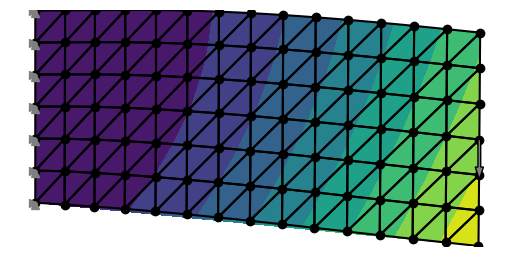

In [24]:
# Define cantilever beam with triangle elements 
cantilever_tria = get_cantilever(1.0, 15.0, 7.0, etype=Tria())

# Solve 
d = torch.ones(cantilever_tria.elements.shape[0])
u, f = cantilever_tria.solve(d)

# Plot 
cantilever_tria.plot(u, node_property=torch.norm(u, dim=1))